**INSTALLATION OF PYSPARK AND CREATION OF SPARKSESSION** 

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark import SparkContext

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
                    .master("local")\
                    .appName('Firstprogram')\
                    .getOrCreate()

In [ ]:
sc=spark.sparkContext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READING FILE IN PYSPARK**

In [ ]:
authors = spark.read.csv('/content/drive/MyDrive/Airs_quality.csv', sep=',',
                         inferSchema=True, header=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READING FILE IN PYTHON** 

In [ ]:
import pandas as pd
col=pd.read_csv('/content/drive/MyDrive/Airs_quality (1).csv')

In [ ]:
col

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2_5
0,37.572016,127.005008,0.004,0.059,0.002,1.2,73,57
1,37.572016,127.005008,0.004,0.058,0.002,1.2,71,59
2,37.572016,127.005008,0.004,0.056,0.002,1.2,70,59
3,37.572016,127.005008,0.004,0.056,0.002,1.2,70,58
4,37.572016,127.005008,0.003,0.051,0.002,1.2,69,61
...,...,...,...,...,...,...,...,...
647506,37.544962,127.136792,0.003,0.028,0.013,0.5,23,17
647507,37.544962,127.136792,0.003,0.025,0.015,0.4,25,19
647508,37.544962,127.136792,0.003,0.023,0.015,0.4,24,17
647509,37.544962,127.136792,0.003,0.040,0.004,0.5,25,18


**PREPROCESSING IN PYSPARK**

In [ ]:
df = authors.toPandas()
df.head()

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2_5
0,37.572016,127.005008,0.004,0.059,0.002,1.2,73,57
1,37.572016,127.005008,0.004,0.058,0.002,1.2,71,59
2,37.572016,127.005008,0.004,0.056,0.002,1.2,70,59
3,37.572016,127.005008,0.004,0.056,0.002,1.2,70,58
4,37.572016,127.005008,0.003,0.051,0.002,1.2,69,61


In [ ]:
authors.head(5)

[Row(Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73, PM2_5=57),
 Row(Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.058, O3=0.002, CO=1.2, PM10=71, PM2_5=59),
 Row(Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.056, O3=0.002, CO=1.2, PM10=70, PM2_5=59),
 Row(Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.056, O3=0.002, CO=1.2, PM10=70, PM2_5=58),
 Row(Latitude=37.5720164, Longitude=127.0050075, SO2=0.003, NO2=0.051, O3=0.002, CO=1.2, PM10=69, PM2_5=61)]

In [ ]:
df.head(5)

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2_5
0,37.572016,127.005008,0.004,0.059,0.002,1.2,73,57
1,37.572016,127.005008,0.004,0.058,0.002,1.2,71,59
2,37.572016,127.005008,0.004,0.056,0.002,1.2,70,59
3,37.572016,127.005008,0.004,0.056,0.002,1.2,70,58
4,37.572016,127.005008,0.003,0.051,0.002,1.2,69,61


**NORMALIZATION IN PYSPARK**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
columns_to_scale = ['Latitude',	'Longitude',	'SO2',	'NO2',	'O3',	'CO',	'PM10','PM2_5']
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(authors)
scaledData = scalerModel.transform(authors)

In [ ]:
scaledData.show()

+----------+-----------+-----+-----+-----+---+----+-----+------------+-------------+-------+-------+-------+------+--------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM2_5|Latitude_vec|Longitude_vec|SO2_vec|NO2_vec| O3_vec|CO_vec|PM10_vec|PM2_5_vec|     Latitude_scaled|    Longitude_scaled|          SO2_scaled|          NO2_scaled|           O3_scaled|           CO_scaled|         PM10_scaled|        PM2_5_scaled|
+----------+-----------+-----+-----+-----+---+----+-----+------------+-------------+-------+-------+-------+------+--------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|37.5720164|127.0050075|0.004|0.059|0.002|1.2|  73|   57|[37.5720164]|[127.0050075]|[0.004]

In [ ]:
scaledData=scaledData.drop('Latitude','Longitude',  'SO2',  'NO2',   'O3', 'CO','PM10','PM2_5','Latitude_vec','Longitude_vec','SO2_vec','NO2_vec','O3_vec','CO_vec','PM10_vec','PM2_5_vec')

In [ ]:
scaledData.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Latitude_scaled|    Longitude_scaled|          SO2_scaled|          NO2_scaled|           O3_scaled|           CO_scaled|         PM10_scaled|        PM2_5_scaled|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|[0.5796967697490851]|[0.5631092712498413]|[0.21199324324324...|[0.02684750919001...|[0.02895953757225...|[0.03026134800550...|[0.02063005296905...|[0.00926961802780...|
|[0.5796967697490851]|[0.5631092712498413]|[0.21199324324324...|[0.02682215743440...|[0.02895953757225...|[0.03026134800550...|[0.02007248396989...|[0.00958926002876...|
|[0.5796967697490851]|[0.5631092712498413]|[0.21199324324324...|[0.02677145392318...|[0.02895953757225...|[0.03026134800550...|[0.01979369947030...|[0

In [ ]:
assembler = VectorAssembler().setInputCols\
            (authors.columns).setOutputCol("features")
transformed = assembler.transform(authors)
scaler = MinMaxScaler(inputCol="features",\
         outputCol="scaledFeatures")
scalermodel =  scaler.fit(transformed.select("features"))
scaleddata = scalermodel.transform(transformed)

In [ ]:
scaleddata.show()

+----------+-----------+-----+-----+-----+---+----+-----+--------------------+--------------------+
|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM2_5|            features|      scaledFeatures|
+----------+-----------+-----+-----+-----+---+----+-----+--------------------+--------------------+
|37.5720164|127.0050075|0.004|0.059|0.002|1.2|  73|   57|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.004|0.058|0.002|1.2|  71|   59|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|   59|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|   58|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.003|0.051|0.002|1.2|  69|   61|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.003|0.046|0.002|1.1|  70|   61|[37.5720164,127.0...|[0.57969676974908...|
|37.5720164|127.0050075|0.003|0.049|0.002|1.1|  66|   57|[37.5720164,127.0...|[0.57969676974908...|


In [ ]:
def extract(row):
    return (row.features,)+tuple(row.scaledFeatures.toArray().tolist())
final_data = scaleddata.select("features","scaledFeatures").rdd\
               .map(extract).toDF(authors.columns)

In [ ]:
final_data.show()

+--------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|            Latitude|         Longitude|               SO2|                NO2|                  O3|                  CO|                PM10|               PM2_5|                  _9|
+--------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|[37.5720164,127.0...|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026847509190011408|0.028959537572254335|0.030261348005502064| 0.02063005296905492|0.009269618027808854|
|[37.5720164,127.0...|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026822157434402333|0.028959537572254335|0.030261348005502064|0.020072483969891274| 0.00958926002876778|
|[37.5720164,127.0...|0.5796967697490851|0.5631092712498413|0.21199324

In [ ]:
final_data=final_data.drop('Latitude')
final_data.show()

+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|         Longitude|               SO2|                NO2|                  O3|                  CO|                PM10|               PM2_5|                  _9|
+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026847509190011408|0.028959537572254335|0.030261348005502064| 0.02063005296905492|0.009269618027808854|
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026822157434402333|0.028959537572254335|0.030261348005502064|0.020072483969891274| 0.00958926002876778|
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026771453923184182|0.028959537572254335|0.030261348005502064| 0.01979369947030945| 0.00958926002876778|
|0.5796967

In [ ]:

final_data = final_data.withColumnRenamed('Longitude','Latitude').withColumnRenamed('SO2',"Longitude").withColumnRenamed('NO2',"SO2").withColumnRenamed('O3',"NO2").withColumnRenamed('CO',"O3").withColumnRenamed('PM10',"CO").withColumnRenamed('Pm2_5',"Pm10").withColumnRenamed('_9',"PM2_5")
final_data.show()


+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|          Latitude|         Longitude|                SO2|                 NO2|                  O3|                  CO|                Pm10|               PM2_5|
+------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026847509190011408|0.028959537572254335|0.030261348005502064| 0.02063005296905492|0.009269618027808854|
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026822157434402333|0.028959537572254335|0.030261348005502064|0.020072483969891274| 0.00958926002876778|
|0.5796967697490851|0.5631092712498413|0.21199324324324323|0.026771453923184182|0.028959537572254335|0.030261348005502064| 0.01979369947030945| 0.00958926002876778|
|0.5796967

**IMPORTING SEABORN**

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**FINDING CORRELATIONS BETWEEN FEATURES IN OUR DATASET**

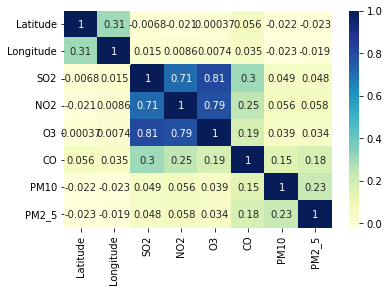

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(col.corr(), cmap="YlGnBu", annot=True)
# displaying the plotted heatmap
plt.show()

**NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X = sc.fit_transform(col)
X = pd.DataFrame(X,columns=['latitude','longitude','so2','no2','o3','c0','pm10','pm2_5'])

In [ ]:
X

,latitude,longitude,so2,no2,o3,c0,pm10,pm2_5
0,0.347885,0.198855,0.073509,0.316809,-0.160902,1.704347,0.411766,0.719142
1,0.347885,0.198855,0.073509,0.308125,-0.160902,1.704347,0.383652,0.764675
2,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.764675
3,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.741909
4,0.347885,0.198855,0.060824,0.247336,-0.160902,1.704347,0.355537,0.810207
...,...,...,...,...,...,...,...,...
647506,-0.159951,1.871453,0.060824,0.047602,-0.050136,-0.022691,-0.291100,-0.191510
647507,-0.159951,1.871453,0.060824,0.021550,-0.029996,-0.269411,-0.262985,-0.145977
647508,-0.159951,1.871453,0.060824,0.004181,-0.029996,-0.269411,-0.277042,-0.191510
647509,-0.159951,1.871453,0.060824,0.151811,-0.140763,-0.022691,-0.262985,-0.168744


**FINDING CORRELATIONS BETWEEN FEATURES IN OUR NORMALIZED DATA**

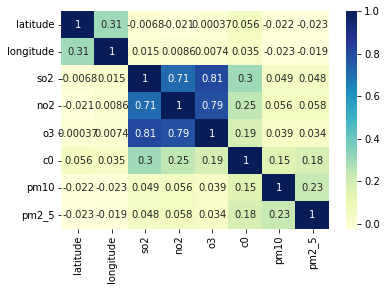

In [ ]:
dataplot=sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)

In [ ]:
X.corr()

,latitude,longitude,so2,no2,o3,c0,pm10,pm2_5
latitude,1.000000,0.307581,-0.006797,-0.020962,0.000373,0.056444,-0.021874,-0.023076
longitude,0.307581,1.000000,0.015209,0.008582,0.007398,0.035379,-0.022757,-0.018933
so2,-0.006797,0.015209,1.000000,0.712422,0.805551,0.304923,0.048573,0.047531
no2,-0.020962,0.008582,0.712422,1.000000,0.785805,0.245746,0.055532,0.057844
o3,0.000373,0.007398,0.805551,0.785805,1.000000,0.188998,0.038602,0.033868
c0,0.056444,0.035379,0.304923,0.245746,0.188998,1.000000,0.151166,0.182867
pm10,-0.021874,-0.022757,0.048573,0.055532,0.038602,0.151166,1.000000,0.228984
pm2_5,-0.023076,-0.018933,0.047531,0.057844,0.033868,0.182867,0.228984,1.000000


**As we can see from above heatmap the correlation between O3 and sO2 ,O3 and NO2 are high so we take one one feature from them i.e O3 and drop other two feature i.e. NO2,SO2 and we also drop latitude and longitude column too as they not give any useful information.**

****

In [ ]:
y=X[['o3','c0','pm10','pm2_5']]

In [ ]:
y

,o3,c0,pm10,pm2_5
0,-0.160902,1.704347,0.411766,0.719142
1,-0.160902,1.704347,0.383652,0.764675
2,-0.160902,1.704347,0.369594,0.764675
3,-0.160902,1.704347,0.369594,0.741909
4,-0.160902,1.704347,0.355537,0.810207
...,...,...,...,...
647506,-0.050136,-0.022691,-0.291100,-0.191510
647507,-0.029996,-0.269411,-0.262985,-0.145977
647508,-0.029996,-0.269411,-0.277042,-0.191510
647509,-0.140763,-0.022691,-0.262985,-0.168744


In [ ]:
import matplotlib.pyplot  as plt
import sklearn
import numpy as np

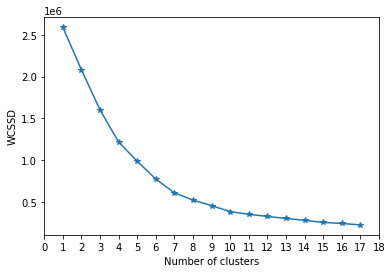

In [ ]:
orig = y.iloc[:, :].values

from sklearn.cluster import KMeans
wcssd = [] 
for i in range(1, 18): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10, random_state = 50)
    kmeans.fit(orig) 
    wcssd.append(kmeans.inertia_)
plt.plot(range(1, 18), wcssd,marker='*')
plt.xticks(np.arange(0,19))
plt.xlabel('Number of clusters')
plt.ylabel('WCSSD') 
plt.show()

In [ ]:
# ratio for deriving the elbow pt.(optimal value of clusters)
ratio=[]
count=2
for (i, j,k) in zip(wcssd, wcssd[1:],wcssd[2:]):
    ratio.append(abs(i-j)/abs(j-k))
    #count+=1
# for printing the wcss value ration for corresponding cluster
for i in ratio:
    print("cluster ",count,":",i)
    count+=1

cluster  2 : 1.0581631985701978
cluster  3 : 1.2487856658684038
cluster  4 : 1.668071007330428
cluster  5 : 1.0785823792731524
cluster  6 : 1.3013881595414742
cluster  7 : 1.892824790649196
cluster  8 : 1.2925246212555332
cluster  9 : 0.9498782399510037
cluster  10 : 2.1672512707950276
cluster  11 : 1.2762844616850597
cluster  12 : 1.0441363402285968
cluster  13 : 1.119804676239961
cluster  14 : 0.8676091844718363
cluster  15 : 2.021282029247318
cluster  16 : 0.7146897186783777


In [ ]:
km=KMeans(n_clusters=10)
print("km= ",km)
y_pred=km.fit_predict(y[['o3','c0','pm10','pm2_5']])   #to see what are predicted clusters assigned to each sample
print(y_pred)

km=  KMeans(n_clusters=10)
[9 9 9 ... 0 0 0]


In [ ]:
#adding a cluster column in dataframe which will give the predicted cluster for each sample
y['cluster']=y_pred
y.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,o3,c0,pm10,pm2_5,cluster
0,-0.160902,1.704347,0.411766,0.719142,9
1,-0.160902,1.704347,0.383652,0.764675,9
2,-0.160902,1.704347,0.369594,0.764675,9
3,-0.160902,1.704347,0.369594,0.741909,9
4,-0.160902,1.704347,0.355537,0.810207,9
5,-0.160902,1.457627,0.369594,0.810207,9
6,-0.160902,1.457627,0.313365,0.719142,9
7,-0.160902,1.210908,0.383652,0.787441,9
8,-0.160902,1.457627,0.397709,0.787441,9
9,-0.160902,1.457627,0.425824,0.855740,9


In [ ]:
y.tail(40)

,o3,c0,pm10,pm2_5,cluster
647471,-0.150833,0.470749,-0.094297,0.058919,4
647472,-0.150833,0.717468,-0.009953,0.081686,4
647473,-0.150833,0.717468,0.060333,0.172751,4
647474,-0.150833,0.964188,0.130620,0.241050,4
647475,-0.150833,0.717468,0.200907,0.377648,4
647476,-0.150833,0.717468,1.972130,3.360034,9
647477,-0.120623,0.224029,0.032219,0.218283,4
647478,-0.050136,0.224029,0.004104,0.263816,4
647479,0.000213,0.224029,-0.024011,0.218283,4
647480,-0.019927,0.224029,0.046276,0.263816,4


In [ ]:
orig1=y[['o3','c0','pm10','pm2_5']]

In [ ]:
orig1

,o3,c0,pm10,pm2_5
0,-0.160902,1.704347,0.411766,0.719142
1,-0.160902,1.704347,0.383652,0.764675
2,-0.160902,1.704347,0.369594,0.764675
3,-0.160902,1.704347,0.369594,0.741909
4,-0.160902,1.704347,0.355537,0.810207
...,...,...,...,...
647506,-0.050136,-0.022691,-0.291100,-0.191510
647507,-0.029996,-0.269411,-0.262985,-0.145977
647508,-0.029996,-0.269411,-0.277042,-0.191510
647509,-0.140763,-0.022691,-0.262985,-0.168744


In [ ]:
orig2=y[['cluster']]

In [ ]:
orig2

,cluster
0,9
1,9
2,9
3,9
4,9
...,...
647506,0
647507,0
647508,0
647509,0


In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(orig1, orig2, 
                            test_size=0.2, random_state=0) 

In [ ]:
from sklearn.linear_model import LogisticRegression  
regressor = LogisticRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training complete.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pre_y=regressor.predict(x_test)

In [ ]:
regressor.score(x_test,y_test)

0.9992432607738817

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71028
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       757
           3       0.99      1.00      0.99       147
           4       1.00      1.00      1.00     46386
           5       0.00      0.00      0.00         0
           6       0.90      0.93      0.92        41
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00     10855

    accuracy                           1.00    129503
   macro avg       0.89      0.89      0.89    129503
weighted avg       1.00      1.00      1.00    129503



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**APPLYING PCA**

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
Y = pca.fit_transform(X)
data_pca = pd.DataFrame(Y,columns=['PC1','PC2',])
data_pca.head()


,PC1,PC2
0,0.669253,0.287976
1,0.666115,0.294991
2,0.655493,0.290322
3,0.653535,0.281693
4,0.627551,0.304426


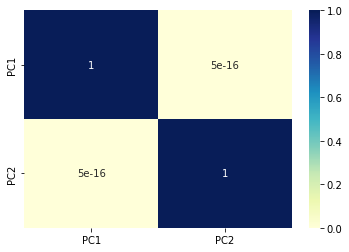

In [ ]:
sns.heatmap(data_pca.corr(),cmap="YlGnBu", annot=True)

In [ ]:
data_pca.corr()

,PC1,PC2
PC1,1.000000e+00,5.028708e-16
PC2,5.028708e-16,1.000000e+00


(-30.0, 40.0)

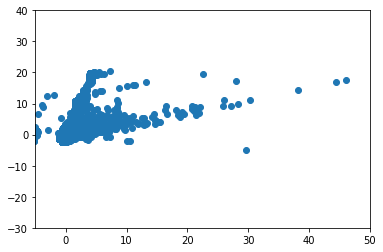

In [ ]:
plt.scatter(data_pca['PC1'],data_pca['PC2'])
plt.xlim(-5, 50)
plt.ylim(-30, 40)

In [ ]:

import matplotlib.pyplot  as plt
import sklearn
import numpy as np

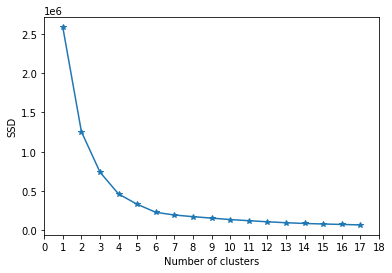

In [ ]:
X_= data_pca.iloc[:, :].values

from sklearn.cluster import KMeans
ssd = [] 
for i in range(1, 18): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10, random_state = 50)
    kmeans.fit(X_) 
    ssd.append(kmeans.inertia_)
plt.plot(range(1, 18), ssd,marker='*')
plt.xticks(np.arange(0,19))
plt.xlabel('Number of clusters')
plt.ylabel('SSD') 
plt.show()

In [ ]:
# ratio for deriving the elbow pt.(optimal value of clusters)
ratio=[]
count=2
for (i, j,k) in zip(ssd, ssd[1:],ssd[2:]):
    ratio.append(abs(i-j)/abs(j-k))
    #count+=1
# for printing the wcss value ration for corresponding cluster
for i in ratio:
    print("cluster ",count,":",i)
    count+=1

cluster  2 : 2.5747272572053195
cluster  3 : 1.8549560558892035
cluster  4 : 2.1296891986187676
cluster  5 : 1.2764261319665602
cluster  6 : 2.9871193651136063
cluster  7 : 1.6318038879459267
cluster  8 : 1.126644807811118
cluster  9 : 1.0173165553468706
cluster  10 : 1.2841431448528666
cluster  11 : 1.0200630806186382
cluster  12 : 1.1742913871475795
cluster  13 : 1.2519431139762043
cluster  14 : 1.4110281484339093
cluster  15 : 1.162605296026594
cluster  16 : 0.9748788199621673


In [ ]:
km1=KMeans(n_clusters=6)
print("km1= ",km1)
y_preds=km1.fit_predict(data_pca[['PC1','PC2']])   #to see what are predicted clusters assigned to each sample
print(y_preds)

km=  KMeans(n_clusters=6)
[4 4 4 ... 0 0 0]


In [ ]:
#adding a cluster column in dataframe which will give the predicted cluster for each sample
data_pca['cluster']=y_preds
data_pca.head(40)

,PC1,PC2,cluster
0,0.669253,0.287976,4
1,0.666115,0.294991,4
2,0.655493,0.290322,4
3,0.653535,0.281693,4
4,0.627551,0.304426,4
5,0.540351,0.284233,4
6,0.542064,0.227716,4
7,0.470114,0.254202,4
8,0.552490,0.285239,4
9,0.553643,0.322282,4


In [ ]:

data_pca.tail(40)

,PC1,PC2,cluster
647471,0.216710,-0.976803,0
647472,0.290346,-0.909559,0
647473,0.315759,-0.849586,0
647474,0.404028,-0.770956,4
647475,0.356873,-0.719789,4
647476,0.750242,1.075697,1
647477,0.145720,-0.894975,0
647478,0.134633,-0.889792,0
647479,0.137583,-0.919856,0
647480,0.145523,-0.875449,0


In [ ]:
col1=data_pca[['PC1','PC2']]

In [ ]:
col1

,PC1,PC2
0,0.669253,0.287976
1,0.666115,0.294991
2,0.655493,0.290322
3,0.653535,0.281693
4,0.627551,0.304426
...,...,...
647506,0.011105,-1.200396
647507,-0.050313,-1.200047
647508,-0.064851,-1.221976
647509,0.021552,-1.178605


In [ ]:
col2=data_pca[['cluster']]

In [ ]:
col2

,cluster
0,4
1,4
2,4
3,4
4,4
...,...
647506,0
647507,0
647508,0
647509,0


In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(col1, col2, 
                            test_size=0.2, random_state=0) 

In [ ]:
from sklearn.linear_model import LogisticRegression  
regressor = LogisticRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training complete.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pre=regressor.predict(X_test)

In [ ]:
y_pre

array([0, 4, 4, ..., 4, 4, 4], dtype=int32)

In [ ]:
regressor.score(X_test,Y_test)

0.9994594719813441

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31806
           1       1.00      1.00      1.00     43157
           2       1.00      1.00      1.00       700
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00     53478
           5       1.00      0.99      1.00       362

    accuracy                           1.00    129503
   macro avg       0.83      0.83      0.83    129503
weighted avg       1.00      1.00      1.00    129503



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(Y_test, y_pre))

Accuracy:  0.9994594719813441


**APPLYING LDA ALGORITHM**

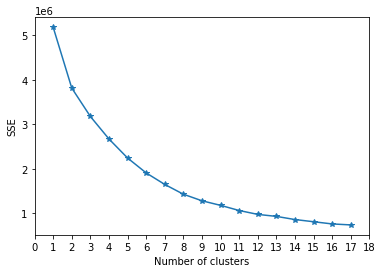

In [ ]:
column = X.iloc[:, :].values

from sklearn.cluster import KMeans
sse = [] 
for i in range(1, 18): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10, random_state = 50)
    kmeans.fit(column) 
    sse.append(kmeans.inertia_)
plt.plot(range(1, 18 ), sse,marker='*')
plt.xticks(np.arange(0,19))
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

In [ ]:
# ratio for deriving the elbow pt.(optimal value of clusters)
ratio=[]
count=2
for (i, j,k) in zip(sse, sse[1:],sse[2:]):
    ratio.append(abs(i-j)/abs(j-k))
    #count+=1
# for printing the wcss value ration for corresponding cluster
for i in ratio:
    print("cluster ",count,":",i)
    count+=1

cluster  2 : 2.143242471196875
cluster  3 : 1.2600068913054554
cluster  4 : 1.1842213577855218
cluster  5 : 1.2758120542782314
cluster  6 : 1.2939104143566933
cluster  7 : 1.1786518613423151
cluster  8 : 1.487029646470875
cluster  9 : 1.4388118609900225
cluster  10 : 0.8877716260974364
cluster  11 : 1.3235651520281382
cluster  12 : 1.9501500576724022
cluster  13 : 0.6314868695196153
cluster  14 : 1.4435580752870465
cluster  15 : 0.9932999081832465
cluster  16 : 2.2505771551623637


In [ ]:
km2=KMeans(n_clusters=16)
print("km2= ",km2)
ys_preds=km2.fit_predict(X[['latitude','longitude','so2','no2','o3','c0','pm10','pm2_5']])   #to see what are predicted clusters assigned to each sample
print(ys_preds)


km2=  KMeans(n_clusters=16)
[ 4  4  4 ... 12 12 12]


In [ ]:
X['cluster']=ys_preds
X.head(40)

,latitude,longitude,so2,no2,o3,c0,pm10,pm2_5,cluster
0,0.347885,0.198855,0.073509,0.316809,-0.160902,1.704347,0.411766,0.719142,4
1,0.347885,0.198855,0.073509,0.308125,-0.160902,1.704347,0.383652,0.764675,4
2,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.764675,4
3,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.741909,4
4,0.347885,0.198855,0.060824,0.247336,-0.160902,1.704347,0.355537,0.810207,4
5,0.347885,0.198855,0.060824,0.203916,-0.160902,1.457627,0.369594,0.810207,4
6,0.347885,0.198855,0.060824,0.229968,-0.160902,1.457627,0.313365,0.719142,4
7,0.347885,0.198855,0.060824,0.195232,-0.160902,1.210908,0.383652,0.787441,4
8,0.347885,0.198855,0.073509,0.212600,-0.160902,1.457627,0.397709,0.787441,4
9,0.347885,0.198855,0.060824,0.212600,-0.160902,1.457627,0.425824,0.855740,4


In [ ]:
a = X[['latitude','longitude','so2','no2','o3','c0','pm10','pm2_5']]

In [ ]:
a

,latitude,longitude,so2,no2,o3,c0,pm10,pm2_5
0,0.347885,0.198855,0.073509,0.316809,-0.160902,1.704347,0.411766,0.719142
1,0.347885,0.198855,0.073509,0.308125,-0.160902,1.704347,0.383652,0.764675
2,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.764675
3,0.347885,0.198855,0.073509,0.290757,-0.160902,1.704347,0.369594,0.741909
4,0.347885,0.198855,0.060824,0.247336,-0.160902,1.704347,0.355537,0.810207
...,...,...,...,...,...,...,...,...
647506,-0.159951,1.871453,0.060824,0.047602,-0.050136,-0.022691,-0.291100,-0.191510
647507,-0.159951,1.871453,0.060824,0.021550,-0.029996,-0.269411,-0.262985,-0.145977
647508,-0.159951,1.871453,0.060824,0.004181,-0.029996,-0.269411,-0.277042,-0.191510
647509,-0.159951,1.871453,0.060824,0.151811,-0.140763,-0.022691,-0.262985,-0.168744


In [ ]:
b=X[['cluster']]

In [ ]:
b

,cluster
0,4
1,4
2,4
3,4
4,4
...,...
647506,12
647507,12
647508,12
647509,12


In [ ]:
from sklearn.model_selection import train_test_split  
x_Train, x_Test, y_Train, y_Test = train_test_split(a, b, 
                            test_size=0.2, random_state=0) 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit_transform(x_Train, y_Train)
lda.score(x_Train,y_Train)

0.9576242065759603

In [ ]:
y_pred=lda.predict(x_Test)

In [ ]:
y_pred

array([ 7, 12,  4, ..., 11,  9,  7], dtype=int32)

In [ ]:
print(classification_report(y_Test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.94      1.00      0.97     21108
           2       1.00      1.00      1.00       212
           3       1.00      1.00      1.00       700
           4       1.00      0.64      0.78      9082
           5       0.95      0.98      0.96        42
           7       0.97      1.00      0.98     14483
           8       0.96      1.00      0.98       147
           9       0.95      1.00      0.97     30559
          11       0.95      1.00      0.98     17931
          12       0.96      1.00      0.98     28068
          13       1.00      0.92      0.96        72
          14       1.00      0.68      0.81      7002
          15       1.00      1.00      1.00         5

    accuracy                           0.96    129503
   macro avg       0.98      0.94      0.96    129503
weighted avg       0.96      0.96      0.95    129503

